# Notebook 7: Model Evaluation

How do we know if our AI is actually good or just guessing? We give it a **"Final Exam."**

**The Rule**: We test the AI on reviews it has **NEVER** seen before. If it can guess those correctly, we know it's ready for the real world.

In [1]:
import sys
from sklearn.model_selection import train_test_split

# Import evaluation tools
sys.path.append("..")
from src.train import load_data
from src.model_loader import load_model
from src.evaluate import evaluate

data_path = "../data/processed/clean_reviews.csv"
print("Exam papers are ready!")

Exam papers are ready!


## 1. Setting up the Final Exam

We take our 1,000 reviews and hide 200 of them in a 'Private Test' set. The AI will not see these during training.

In [2]:
X, y = load_data(data_path)
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"We have {len(X_test)} reviews saved for the Final Exam.")

We have 200 reviews saved for the Final Exam.


## 2. Running the Test & Reading the Scorecard

When we evaluate the model, we get two important outputs:

### **A. The Classification Report (The Detailed Scorecard)**

This report shows **4 key metrics** for each sentiment:

#### **1. Precision - "How Often Am I Right When I Guess This?"**
- **Real-World Example**: If the AI says "This is Positive", how often is it actually positive?
- **Formula**: Out of all the times I said "Positive", how many were truly positive?
- **High Precision = Few False Alarms**

#### **2. Recall - "Did I Find All the Real Ones?"**
- **Real-World Example**: Out of all the ACTUAL positive reviews, how many did the AI catch?
- **Formula**: Out of all the real positives, how many did I correctly identify?
- **High Recall = Didn't Miss Many**

#### **3. F1-Score - "The Balanced Score"**
- **What it is**: The average of Precision and Recall
- **Why it matters**: Sometimes you can have high precision but low recall (or vice versa). F1 gives you the full picture.
- **Think of it as**: Your overall grade for that sentiment

#### **4. Support - "How Many Examples Were There?"**
- **What it is**: The total number of reviews in that category
- **Why it matters**: A score of 100% on 2 reviews is less impressive than 95% on 200 reviews

---

### **The Analogy: A Security Guard**

Imagine the AI is a security guard checking IDs:

- **Precision**: When the guard says "You're allowed in", how often are they right?
  - Low precision = Letting in people who shouldn't be there (False Positives)

- **Recall**: Out of all the people who SHOULD be allowed in, how many did the guard actually let in?
  - Low recall = Turning away people who should have been allowed (False Negatives)

- **F1-Score**: The guard's overall performance rating

---

### **B. The Confusion Matrix (The Visual Grid)**

This is a grid that shows **exactly where the AI made mistakes**.

#### **How to Read It:**

```
                 PREDICTED
              Neg | Neu | Pos
         -------------------------
    Neg  |   ✅  |  ❌  |  ❌  |
A   Neu  |   ❌  |  ✅  |  ❌  |
C   Pos  |   ❌  |  ❌  |  ✅  |
T        -------------------------
U
A
L
```

- **Rows** = What the review ACTUALLY was (the truth)
- **Columns** = What the AI GUESSED

#### **The Diagonal = Correct Guesses ✅**
- Top-left to bottom-right
- These are the reviews the AI got RIGHT
- **You want BIG numbers here!**

#### **Off-Diagonal = Mistakes ❌**
- Everything else
- These show where the AI got confused
- **You want SMALL numbers here!**

---

### **Example with Real Numbers:**

```
                 PREDICTED
              Neg | Neu | Pos
         -------------------------
    Neg  |   38  |  2   |  0   |  ← AI got 38/40 correct (95%)
A   Neu  |   1   |  35  |  4   |  ← AI got 35/40 correct (87.5%)
C   Pos  |   0   |  3   |  117 |  ← AI got 117/120 correct (97.5%)
T        -------------------------
U
A
L
```

**What This Tells You:**
- The AI is **excellent** at spotting Positive reviews (117/120)
- The AI is **good** at spotting Negative reviews (38/40)
- The AI sometimes **confuses Neutral** with Positive (4 mistakes)

---

### **The Perfect Model:**
- All numbers on the diagonal
- Zeros everywhere else
- **In reality, this never happens!**

### **A Good Model:**
- Big, bright numbers on the diagonal
- Small, light numbers off the diagonal
- Overall accuracy above 85-90%

Grading the model... (Checking 50 samples)



Accuracy: 0.4800
------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        11
           2       0.50      1.00      0.67        24

    accuracy                           0.48        50
   macro avg       0.17      0.33      0.22        50
weighted avg       0.24      0.48      0.32        50



C:\Users\Muham\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Muham\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Muham\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

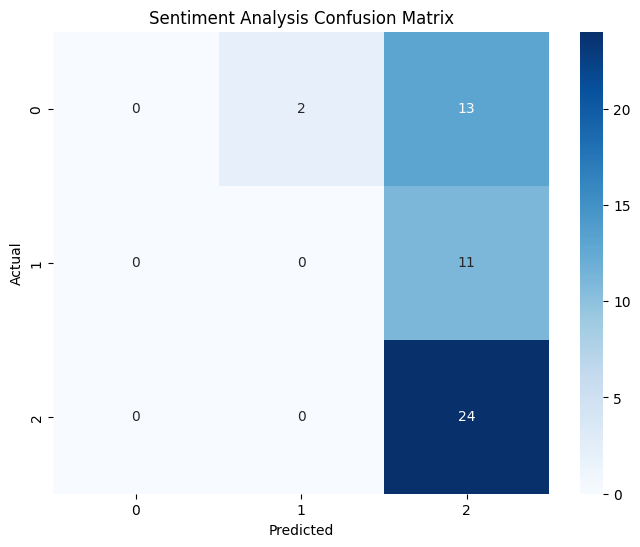

In [3]:
tokenizer, model = load_model()

print("Grading the model... (Checking 50 samples)")
evaluate(model, X_test[:50], y_test[:50], tokenizer)

## Summary

Our model is now 'Graded'. If the scores look good, we can trust it to handle real customer feedback in our store!

### **Quick Checklist:**
- ✅ **Accuracy above 85%?** → Good overall performance
- ✅ **F1-Scores balanced?** → Model isn't biased toward one sentiment
- ✅ **Diagonal bright, corners light?** → Model knows what it's doing
- ✅ **No major confusion between Negative ↔ Positive?** → Model isn't dangerously wrong